<a href="https://colab.research.google.com/github/julopezrio/SYS/blob/main/ejer_notebook5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicios notebook 5

In [46]:
import matplotlib.pyplot as plt
import numpy as np

##Ejercicio 1
Graficar la potencia media de una impedancia  $R+jwL$ , cuándo es excitada por una fuente sinusoidal.

Graficar la potencia media de una impedancia  $R−j\frac{1}{wC}$ , cuándo es excitada por una fuente sinusoidal.

Ver cuaderno https://github.com/amalvarezme/SenalesSistemas/blob/master/1_IntroduccionSyS/6_Potencia_Circutios.ipynb para repaso conceptos básicos potencia en circuitos.

Para el primer ejercicio se toma la corriente como la siguiente ecuacion $$
i(t) = I_{max}\sin(\omega t) $$ se pone sus parametros mas los valores de la impedancia que piden en el primer caso R y L, definimos los tiempos de integracion y las muestras, el voltaje max y su ecuacion a plotear, la potencia instantanea y la potencia media como la ecuacion descrita en en notebook 6, para la siguiente impedancia se toma

In [47]:
#parametros de R, L y frecuencia angular
w = 300
L = 0.01
R = 4
#parametros dados de la fuente senoidal
Imax = 2
T0 = 2*np.pi/w
N = 100 #número de muestras

t = np.linspace(0, T0, N)
i = Imax*np.sin(w*t) # ecuacion de corriente para este caso

In [48]:
Vmax = np.sqrt(np.square(R)+np.square(w*L))*Imax
theta = np.arctan(w*L/R)

v = Vmax*np.sin(w*t + theta) # ecuacion de voltaje para este caso
p = v*i #potencia instantanea
pm = np.trapz(p, t)/T0 #Potencia media TAMBIEN SE PUEDE RESOLVER POR SYMPY
print("Potencia media: "+str(pm))

Potencia media: 8.000000000000002


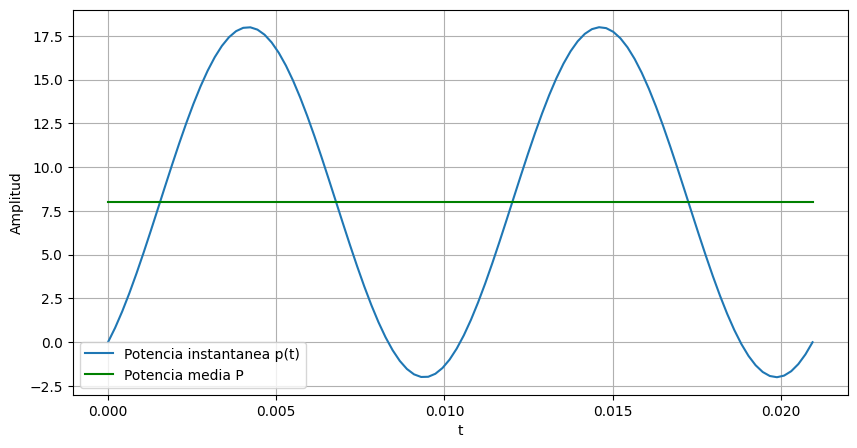

In [49]:
plt.figure(figsize=[10,5])
plt.plot(t, p, label = "Potencia instantanea p(t)")
plt.plot(t, pm*np.ones(len(t)), "g", label = "Potencia media P")
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()
plt.show()

In [50]:
#parametros de R, L y frecuencia angular
w = 300
C = 0.01
R = 4
#parametros dados de la fuente senoidal
Imax = 2
T0 = 2*np.pi/w
N = 100 #número de muestras

t = np.linspace(0, T0, N)
i = Imax*np.sin(w*t)

In [51]:
Vmax = np.sqrt(np.square(R)+np.square(1/(w*C)))*Imax
theta = -np.arctan(1/(w*C*R))

v = Vmax*np.sin(w*t + theta) # ecuacion de voltaje para este caso
p = v*i #potencia instantanea
pm = np.trapz(p, t)/T0 #Potencia media TAMBIEN SE PUEDE RESOLVER POR SYMPY
print("Potencia media: "+str(pm))

Potencia media: 7.999999999999999


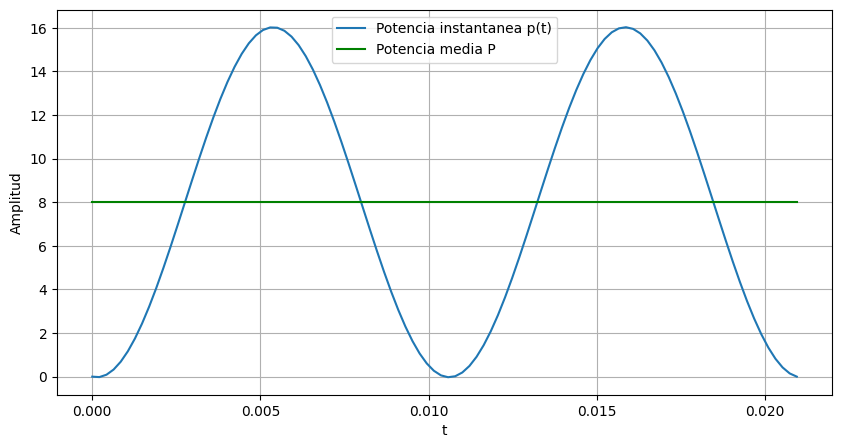

In [52]:
plt.figure(figsize=[10,5])
plt.plot(t, p, label = "Potencia instantanea p(t)")
plt.plot(t, pm*np.ones(len(t)), "g", label = "Potencia media P")
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()
plt.show()

##Ejercicio 2
Discuta el concepto de valor RMS de una señal a partir de su potencia media. Ver conceptos RMS.

Es la raiz del promedio de n valores al cuadrado o la raiz del valor eficaz en variable discreta, para una variable continua estaria expresada como la raiz de la potencia media

##Ejercicio 3
Finalmente, clasifique la señal  $x(t)=e^{−αt}$ t  como de energía o de potencia. Compruebe el resultado solucionando la integral por partes.

Ayuda: declare la función en la variable x en el siguiente bloque de código como se muestra a continuación.

In [53]:
from sympy import *
T = symbols('T', real = True)
t = symbols('t', Real = True)
a = symbols('a', Real = True, nonzero = True, nonnegative = True)
x = exp(-a*t)*t
E = integrate(x**2, (t, -oo, oo))
print('La energía total de la señal es:')
E
P = limit(integrate(x**2, (t, -T/2, T/2)) / T, T, oo)
print('\nLa potencia media de la señal es:')
P

La energía total de la señal es:

La potencia media de la señal es:


oo

##Ejercicio 4

La distancia entre dos señales $x_1(t)$ y $x_2(t)$ se puede dar en términos de la potencia media de la diferencia entre ellas; es decir, la potencia media del error.

$$
d(x_1, x_2) = \bar{P}_{x_1-x_2}=\lim_{T \to \infty} \frac{1}{T} \int_T |x_1(t)-x_2(t)|^{2}~dt
$$

Sea $x_1(t)$ y $x_2(t$) dos señales periódicas de periodo fundamental $T_0$ como se muestra a continuación.

$$
x_1(t) = \cos(w_0t), ~~~ w_0 = \frac{2\pi}{T_0}\\
x_2(t)= \left\{ \begin{array}{lcc}
             ~~~1 &   si  & 0 \leq t < \frac{T}{4} \\
             \\ -1 &  si &  \frac{T}{4} \leq t < \frac{3T}{4} \\
             \\ ~~~1 &  si  & \frac{3T}{4} \leq t < T
             \end{array}
   \right.
$$

Determine la distancia entre las dos señales.

In [54]:
from sympy import *
To=1
wo = 2*np.pi/To
x1 = cos(wo*t)
x2 = 1
a = integrate((x1-x2)**2, (t, 0, To/4))
b= integrate((x1+x2)**2, (t, To/4, 3*To/4))
c= integrate((x1-x2)**2, (t, 3*To/4, To))

P = (a+b+c)/To
print('\nLa potencia media de la señal es:')
P


La potencia media de la señal es:


0.226760455264837

##Ejercicio 5
Demostrar que la norma al cuadrado de una señal equivale a su energía.

In [55]:
import numpy as np
from scipy.integrate import quad

# Definir la señal
def x(t):
    return np.exp(-t**2)  # Ejemplo: señal gaussiana

# Norma al cuadrado (o energía)
def energy(t):
    return x(t)**2

# Cálculo de la norma al cuadrado
integral, _ = quad(energy, -np.inf, np.inf)  # Integral desde -∞ hasta ∞

# Mostrar el resultado
print(f"Energía de la señal (norma al cuadrado): {integral}")

Energía de la señal (norma al cuadrado): 1.2533141373155017


$$
E_T = \int_{-\infty}^{\infty} |x(t)|^{2}~dt. \tag{4}
$$


$$
\|x(t) \|_2^2 = \int_{-\infty}^{\infty} |x(t)|^{2}~dt,  \tag{2}
$$